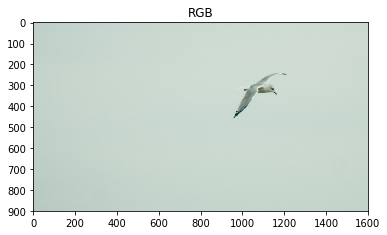

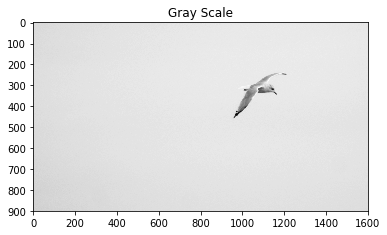

0.8670705295138903


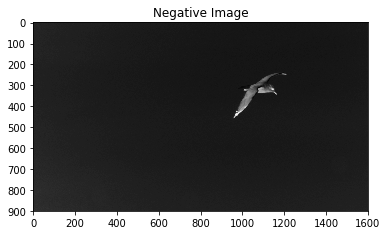

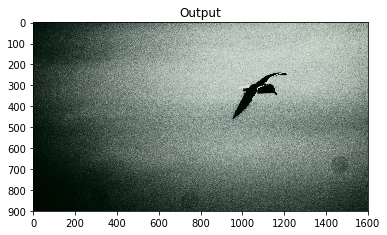

In [77]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

def image_agcwd(img, a=0.75):
    h,w = img.shape[:2]
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    
    unique_intensity = np.unique(img)
    p_max, p_min = cdf_normalized[255], cdf_normalized[0]
    c_wd = (p_max * ((cdf_normalized - p_min) / (p_max - p_min))**a) 
    g_wd = 1 - c_wd

#     plt.plot(c_wd, color = 'r')
#     plt.plot(g_wd, color = 'b')
#     plt.show()
    
    img_new = img.copy()
    for i in unique_intensity:
        img_new[img==i] = np.round(255 * (i / 255)**g_wd[i])

    return img_new

def image_agcwd_truncated(img, a=0.25):
    h,w = img.shape[:2]
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    
    unique_intensity = np.unique(img)
    plt.plot(cdf_normalized, color = 'b')
    plt.plot(1-cdf_normalized, color = 'r')
    plt.ylim([0.5,0.6])
    plt.show()
    
    p_max, p_min = cdf_normalized[0],cdf_normalized[255]
    c_wd = (p_max * ((cdf_normalized - p_min) / (p_max - p_min))**a) 
    g_wd = np.maximum(0.5,1 - c_wd)
    
    img_new = img.copy()
    for i in unique_intensity:
        img_new[img==i] = np.round(255 * (i / 255)**g_wd[i])

    return img_new

def process_bright(img):
    img_negative = 255 - img
    plt.imshow(img_negative, cmap='gray')
    plt.title('Negative Image')
    plt.show()
    
    agcwd = image_agcwd(img_negative)
    reversed = 255 - agcwd
    return reversed

def process_dimmed(img):
    agcwd = image_agcwd_truncated(img)
    return agcwd

# Read image
img = cv2.imread('outputs/bright1.png',)
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y = YCrCb[:,:,0]
plt.imshow(rgb)
plt.title('RGB')
plt.show()
plt.imshow(Y, cmap='gray')
plt.title('Gray Scale')
plt.show()

# Determine whether image is bright or dimmed
threshold = 0.3
T_t = 112 # Global average brightness 
M,N = img.shape[:2]
m_I = np.sum(Y/(M*N)) 
t = (m_I - T_t)/ T_t
print (t)

img_output = None
if t < -threshold:
    result = process_dimmed(Y)
    YCrCb[:,:,0] = result
    img_output = cv2.cvtColor(YCrCb,cv2.COLOR_YCrCb2RGB)
    plt.imshow(img_output)
    plt.title('Output')
    plt.show()
elif t > threshold:
    result = process_bright(Y)
    YCrCb[:,:,0] = result
    img_output = cv2.cvtColor(YCrCb,cv2.COLOR_YCrCb2RGB)
    plt.imshow(img_output)
    plt.title('Output')
    plt.show()

